In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import os
import nibabel as nib
from scipy.ndimage import find_objects

In [2]:
data_path = "Patient_4chn/Train/BRATS_001" # "Task04_Hippocampus/" 
folders = sorted(os.listdir(data_path))[2:]
#img_path = [data_path + folders[0] + '/' + path for path in sorted(os.listdir(data_path + folders[0])) if path[0].isalpha()]
#roi_path = [data_path + folders[-1] + '/' + path for path in sorted(os.listdir(data_path + folders[-1])) if path[0].isalpha()]
img_path0 = os.path.join(data_path, 'image0.nii.gz')
img_path1 = os.path.join(data_path, 'image1.nii.gz')
img_path2 = os.path.join(data_path, 'image2.nii.gz')
img_path3 = os.path.join(data_path, 'image3.nii.gz')
roi_path = os.path.join(data_path, 'roi.nii.gz')

In [4]:
# brain 4D 
#ind = 0
image0 = nib.load(img_path0)
image1 = nib.load(img_path1)
image2 = nib.load(img_path2)
image3 = nib.load(img_path3)
#image.header['pixdim'][1:4] = 1
roi = nib.load(roi_path) #nib.load(roi_path)
#roi.header['pixdim'][1:4] = 1
img0 = image0.get_fdata()
img1 = image1.get_fdata()
img2 = image2.get_fdata()
img3 = image3.get_fdata()
mask = roi.get_fdata()
#print(img.shape)
print(mask.shape)
# print(np.unique(mask))

(240, 240, 155)


In [6]:
sx, sy, sz = image0.header.get_zooms()

In [7]:
print(sx,sy,sz)

1.0 1.0 1.0


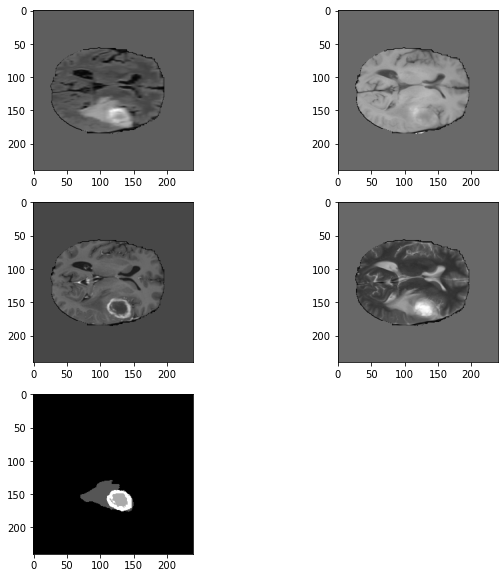

In [8]:
mid = int(img.shape[-1]/2)
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img0[:,:,mid],cmap='gray')
plt.subplot(3,2,2)
plt.imshow(img1[:,:,mid],cmap='gray')
plt.subplot(3,2,3)
plt.imshow(img2[:,:,mid],cmap='gray')
plt.subplot(3,2,4)
plt.imshow(img3[:,:,mid],cmap='gray')

plt.subplot(3,2,5)
plt.imshow(mask[:,:,mid],cmap='gray')

plt.show()

In [20]:
img0.max()

4.729639053344727

In [56]:
folders

['.ipynb_checkpoints', 'imagesTr', 'labelsTr']

In [135]:
# Hippocampus 3D
data_path = 'Task03_Liver/' # "Task04_Hippocampus/" 'Task08_HepaticVessel/'
folders = sorted(os.listdir(data_path))[-3:]
img_path = [data_path + folders[0] + '/' + path for path in sorted(os.listdir(data_path + folders[0])) if path[0].isalpha()]
roi_path = [data_path + folders[-1] + '/' + path for path in sorted(os.listdir(data_path + folders[-1])) if path[0].isalpha()]

ind = 27
img = nib.load(img_path[ind]).get_fdata()
mask = nib.load(roi_path[ind]).get_fdata()
print(img.shape)
print(mask.shape)
print(np.unique(mask))

(512, 512, 422)
(512, 512, 422)
[0. 1. 2.]


In [132]:
nib.load(img_path[ind]).header.get_zooms()

(0.7441406, 0.7441406, 1.5)

In [141]:
img_path[27]

'Task03_Liver/imagesTr/liver_122.nii.gz'

In [139]:
mid_up = np.max([0,int(img.shape[-1]/2)-100])
mid_down = np.min([img.shape[-1], int((img.shape[-1]/2))+300])
img_crop = img[:,:,mid_up:mid_down]
mask_crop = mask[:,:,mid_up:mid_down]

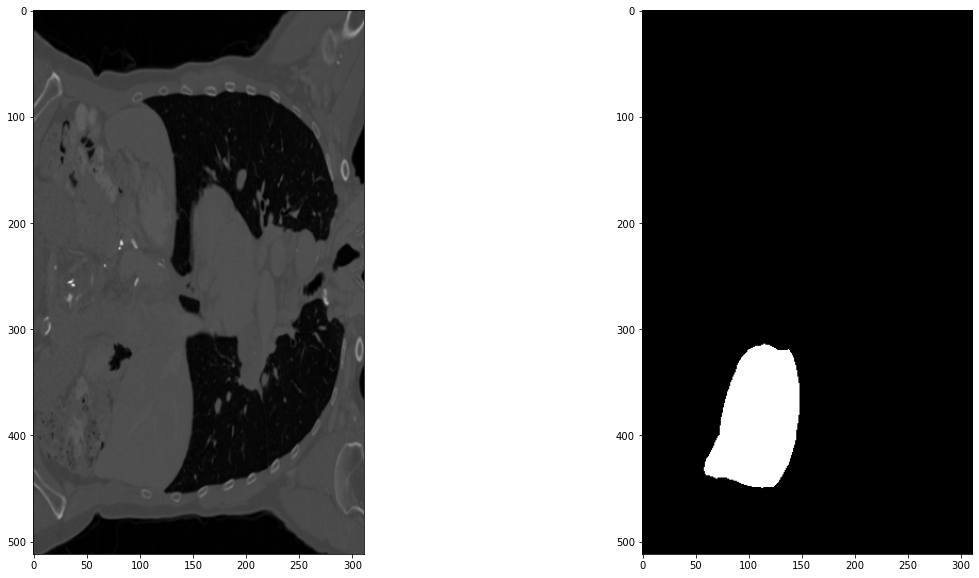

In [140]:
mid = 256 #int(img.shape[-1]/2)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_crop[:,mid,:],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mask_crop[:,mid,:], cmap='gray')
plt.show()

In [8]:
mask[find_objects(mask>0)[0]].shape

(187, 83, 36)

In [8]:
np.where(mask == 2)

(array([273, 273, 273, ..., 422, 422, 422]),
 array([342, 343, 344, ..., 316, 317, 318]),
 array([78, 78, 78, ..., 59, 59, 59]))

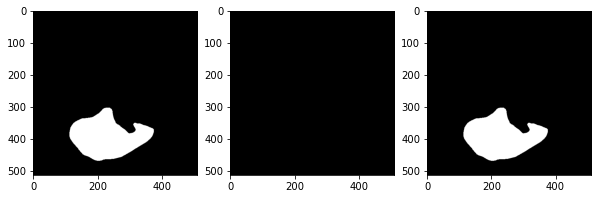

In [12]:
mask_cp = mask[:,:,67]
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(mask_cp == 1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(mask_cp == 2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(mask_cp, cmap='gray')

### Check the dimension of pancreas (patch size selection)

In [5]:
bx = []
by = []
bz = []

for i in roi_path: 
    mask = nib.load(i).get_fdata()
    pancreas_roi = mask[find_objects(mask>0)[0]].shape
    #tumor_roi = mask[find_objects(mask==2)[0]].shape
    bx.append(pancreas_roi[0])
    by.append(pancreas_roi[1])
    bz.append(pancreas_roi[2])

In [6]:
pancreas_roi

(263, 241, 226)

In [7]:
print(np.median(bx), np.median(by), np.median(bz))

284.0 249.0 133.0


pancreas = [160, 90, 30]

liver = [256, 256, 144]

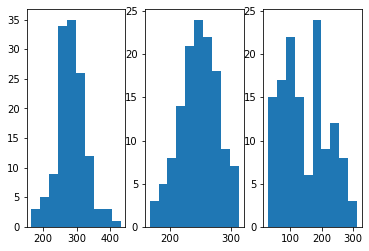

In [23]:
plt.subplot(1,3,1)
plt.hist(bx)
plt.subplot(1,3,2)
plt.hist(by)
plt.subplot(1,3,3)
plt.hist(bz)
plt.show()

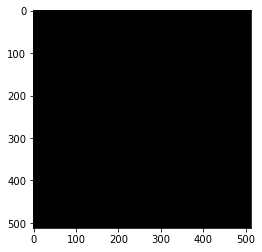

In [17]:
plt.imshow(pred[:,:,24], cmap = 'gray')

In [76]:
patient = 'Patients_Pancreas_2/Train/Pancreas_010/'
roi_path = patient + 'roi.nii.gz'
roi_save_path = patient + 'roi_new.nii.gz'

In [77]:
nib_roi = nib.load(roi_path)
roi = nib_roi.get_fdata()

In [79]:
np.unique(roi)

array([0., 1., 2.])

In [38]:
new_nib_roi = nib.Nifti1Image(roi.astype(int), affine=nib_roi.affine) 
new_nib_roi.set_data_dtype('int32') 
nib.save(new_nib_roi, roi_save_path) 

In [74]:
nib_roi = nib.load(roi_path) 
roi = nib_roi.get_fdata() 
np.unique(roi) 

array([0., 1., 2.])

In [82]:
new_nib_roi.get_data_dtype()

dtype('<i8')

In [65]:
nib_roi = nib.load(roi_path) 
roi = nib_roi.get_fdata() 
#roi = np.array(roi, dtype=np.int32)
new_nib_roi = nib.Nifti1Image(roi.astype(int), affine=nib_roi.affine) 
nib.save(new_nib_roi, roi_save_path) 

In [68]:
nib.load(roi_save_path).get_data_dtype()

dtype('<i8')